<a href="https://colab.research.google.com/github/evelynakim/DATA201/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I recently got into wordle

In [1]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

df = pd.read_csv('https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt', names=['words'])

In [2]:
#exploratory analysis
df.head()

,words
0,a
1,aa
2,aaa
3,aah
4,aahed


In [3]:
df.tail()

,words
370098,zwinglianism
370099,zwinglianist
370100,zwitter
370101,zwitterion
370102,zwitterionic


In [4]:
#more exploratory analysis: 370k+ words, 2 null values, object data type
#I won't remove null data because I will be subsetting it, and the null values may not make their way to the subset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370103 entries, 0 to 370102
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   words   370101 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB


In [5]:
##DATA CLEANING##
#test code to isolate 5-letter words
#print(df[df.words.apply(lambda x: len(x) == 5)].head(),'\n\n',df[df.words.apply(lambda x: len(x) == 5)].tail())
print(df.loc[df['words'].str.len() == 5].head())
#update dataframe to contain only 5-letter words
#df = df[df.words.apply(lambda x: len(x) == 5)]
#create new dataframe containing only 5-letter words
df1 = df.loc[df['words'].str.len() == 5]

    words
4   aahed
8   aalii
17  aargh
18  aaron
34  abaca


In [6]:
#check out new dataframe: ~16k words, no null values, all object data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 4 to 370086
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   15918 non-null  object
dtypes: object(1)
memory usage: 248.7+ KB


In [7]:
#check that all rows are letter/string values
df['words'].str.isalpha().sum()

370101

In [31]:
from numpy.lib.financial import ipmt
#create new dataframe for letter analysis
df2 = pd.DataFrame(columns=['letters'])

#use ascii_lowercase to create a list of all letters
letters = list(string.ascii_lowercase)

#populate new dataframe with each letter in the alphabet under the letters column
for i in letters:
  df2['letters'] = np.resize(letters, len(letters))
#test all letters were populated
print('letters:',list(df2['letters'].values))

#create column that will create a list of words containing the letter in the letters column
for row in df2.index:
    df2.loc[row, 'words'] = ', '.join(list(df1[df1.words.str.contains(df2['letters'][row])]['words']))
#test for loop was successful
print(df2.columns)

#create column counting number of words containing the letter from letters column
for row in df2.index:
    df2.loc[row, 'word count'] = df2['words'][row].count(',')+1
print(df2.columns)

#create column counting number of *occurrences* of the letter from letters column 
#so if it appears twice in one word, it's counted twice instead of once.
for row in df2.index:
   df2.loc[row, 'letter count'] = df2['words'][row].count(df2['letters'][row])
print(df2.columns)

#create column counting the number of instances of a duplicated letter
df2['duplicate letter count'] = df2['letter count']-df2['word count']
print(df2.columns)

df2.head()
#create column counting number of times a letter is duplicated at least once in one word 
#for row in df2.index:
#   df2.loc[row, 'duplicate count'] = df2['words'][row].count(df2['letters'][row])
#from collections import Counter
#[[x,]] for x in df2['letters']]
#print(df2.columns)

#import collections

#d = collections.defaultdict(int)
#for c in thestring:
#    d[c] += 1

letters: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Index(['letters', 'words'], dtype='object')
Index(['letters', 'words', 'word count'], dtype='object')
Index(['letters', 'words', 'word count', 'letter count'], dtype='object')
Index(['letters', 'words', 'word count', 'letter count',
       'duplicate letter count'],
      dtype='object')


,letters,words,word count,letter count,duplicate letter count
0,a,"aahed, aalii, aargh, aaron, abaca, abaci, abac...",7247.0,8392.0,1145.0
1,b,"abaca, abaci, aback, abada, abaff, abaft, abak...",1936.0,2089.0,153.0
2,c,"abaca, abaci, aback, acale, acana, acapu, acar...",2588.0,2744.0,156.0
3,d,"aahed, abada, aband, abdal, abdat, abdom, abed...",2639.0,2811.0,172.0
4,e,"aahed, abase, abate, abaue, abave, abaze, abbe...",6728.0,7800.0,1072.0


In [32]:
#check calculations in df2
#word count column:
wordctlist = []
#for loop to count words containing each letter of the alphabet & add to a list
for i in letters:
  #wordctlist.append(int(
   wordctlist.append(df1.words.str.contains(i).sum())
   #   )
print('words containing each letter') #header
print('old dataframe: ',wordctlist)
print('new dataframe: ',list(df2['word count']))

#letter count column: 
ltrctlist = []
#for loop to count the number of occurrences of each letter of the alphabet
for i in letters:
  ltrctlist.append(sum(df1.words.str.count(i)))
print('\ntotal letter count') #header
print('old dataframe: ',ltrctlist)
print('new dataframe: ',list(df2['letter count']))


#duplicate count column:
#dupctlist = []
#for i in letters:
#  dupctlist.append((df1.words.str.count(i)))

#for i in letters:
#  dupctlist.append((df1.words.str.count(i)))

#print('\ntotal duplicate letter count') #header
#print('old dataframe: ',dupctlist)
#print('new dataframe: ',list(df2['duplicate count']))

words containing each letter
old dataframe:  [7247, 1936, 2588, 2639, 6728, 1115, 1867, 2223, 4767, 372, 1663, 3923, 2361, 3773, 4613, 2148, 139, 4864, 5871, 3866, 3241, 853, 1160, 357, 2476, 435]
new dataframe:  [7247.0, 1936.0, 2588.0, 2639.0, 6728.0, 1115.0, 1867.0, 2223.0, 4767.0, 372.0, 1663.0, 3923.0, 2361.0, 3773.0, 4613.0, 2148.0, 139.0, 4864.0, 5871.0, 3866.0, 3241.0, 853.0, 1160.0, 357.0, 2476.0, 435.0]

total letter count
old dataframe:  [8392, 2089, 2744, 2811, 7800, 1238, 1971, 2284, 5067, 376, 1743, 4246, 2494, 4043, 5219, 2299, 139, 5143, 6537, 4189, 3361, 878, 1171, 361, 2521, 474]
new dataframe:  [8392.0, 2089.0, 2744.0, 2811.0, 7800.0, 1238.0, 1971.0, 2284.0, 5067.0, 376.0, 1743.0, 4246.0, 2494.0, 4043.0, 5219.0, 2299.0, 139.0, 5143.0, 6537.0, 4189.0, 3361.0, 878.0, 1171.0, 361.0, 2521.0, 474.0]


In [33]:
#DATA CLEANING
#change count columns to integer type
df2[['word count', 'letter count','duplicate letter count']] = df2[['word count','letter count','duplicate letter count']].astype(int)
#reorder columns
df2 = df2[['letters','word count','letter count','duplicate letter count','words']]
df2.head()

,letters,word count,letter count,duplicate letter count,words
0,a,7247,8392,1145,"aahed, aalii, aargh, aaron, abaca, abaci, abac..."
1,b,1936,2089,153,"abaca, abaci, aback, abada, abaff, abaft, abak..."
2,c,2588,2744,156,"abaca, abaci, aback, acale, acana, acapu, acar..."
3,d,2639,2811,172,"aahed, abada, aband, abdal, abdat, abdom, abed..."
4,e,6728,7800,1072,"aahed, abase, abate, abaue, abave, abaze, abbe..."


In [34]:
#order letters by word count in descending order
df2.groupby('letters').sum().sort_values(by='word count',ascending=False)

,word count,letter count,duplicate letter count
letters,,,
a,7247,8392,1145
e,6728,7800,1072
s,5871,6537,666
r,4864,5143,279
i,4767,5067,300
o,4613,5219,606
l,3923,4246,323
t,3866,4189,323
n,3773,4043,270


In [36]:
#order letters by letter count in descending order
df2.groupby('letters').sum().sort_values(by='letter count',ascending=False)

,word count,letter count,duplicate letter count
letters,,,
a,7247,8392,1145
e,6728,7800,1072
s,5871,6537,666
o,4613,5219,606
r,4864,5143,279
i,4767,5067,300
l,3923,4246,323
t,3866,4189,323
n,3773,4043,270


In [37]:
#order letters by duplicate letter count in descending order
df2.groupby('letters').sum().sort_values(by='duplicate letter count',ascending=False)#.plot.barh()

,word count,letter count,duplicate letter count
letters,,,
a,7247,8392,1145
e,6728,7800,1072
s,5871,6537,666
o,4613,5219,606
t,3866,4189,323
l,3923,4246,323
i,4767,5067,300
r,4864,5143,279
n,3773,4043,270


Text(0.5, 1.0, 'Number of Words Containing Each Letter')

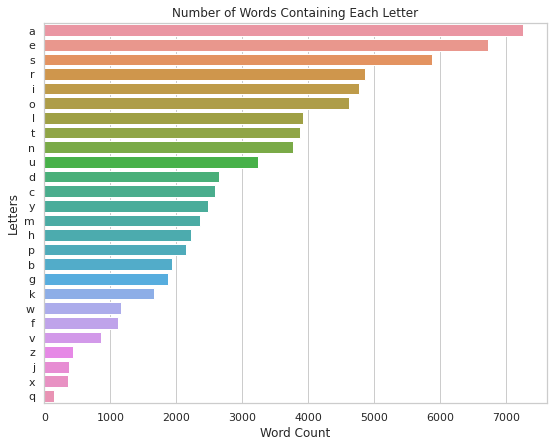

In [38]:
#setup seaborn/matplotlib figure
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(9, 7))

#create visualization ordering letters by the count of words that contain each letter
sns.barplot(x='word count', y='letters', 
            data=df2, 
            order=df2.sort_values('word count', ascending=False).letters)
#labels
plt.xlabel('Word Count')
plt.ylabel('Letters')
plt.title('Number of Words Containing Each Letter')

Text(0.5, 1.0, 'Total Number of Letter Appearances')

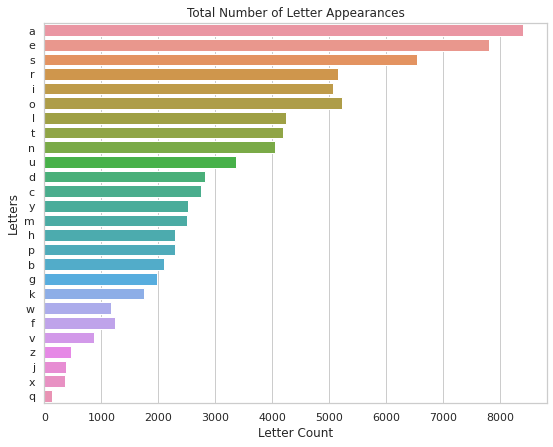

In [39]:
#create visualization ordering letters by the count of words that contain each letter
f, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x='letter count', y='letters', 
            data=df2, 
            order=df2.sort_values('word count', ascending=False).letters)

#labels
plt.xlabel('Letter Count')
plt.ylabel('Letters')
plt.title('Total Number of Letter Appearances')

Text(0.5, 1.0, 'Total Number of Duplicate Letter Appearances')

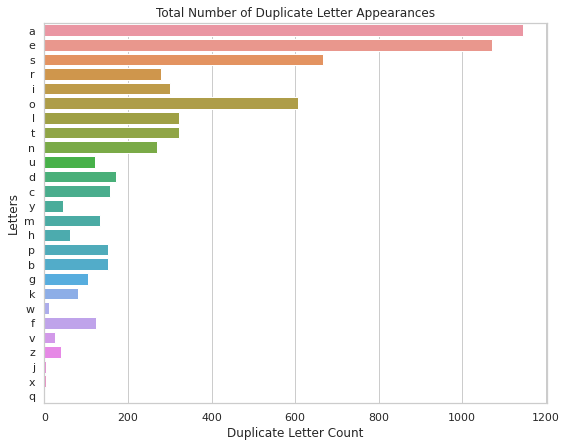

In [40]:
#create visualization ordering letters by the count of times the letter is duplicated (how many more letters than words there are for each letter)
f, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x='duplicate letter count', y='letters', 
            data=df2, 
            order=df2.sort_values('word count', ascending=False).letters)

#labels
plt.xlabel('Duplicate Letter Count')
plt.ylabel('Letters')
plt.title('Total Number of Duplicate Letter Appearances')

In [41]:
#  sns.countplot(x=df[i])

In [43]:
#trying to create a word cloud made up of letters instead of words to visualize letter frequency
def lettercloud(x):
    lettercloud_dict = df2['words']
    wordcloud = WordCloud(width = 1500, height = 500,prefer_horizontal=1,relative_scaling=1,
                      background_color='white',contour_width=10,contour_color="black" ).generate_from_frequencies(lettercloud_dict)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)

#lettercloud(500)

Text(0.5, 1.0, 'Over 4000: Number of Words Containing Each Letter')

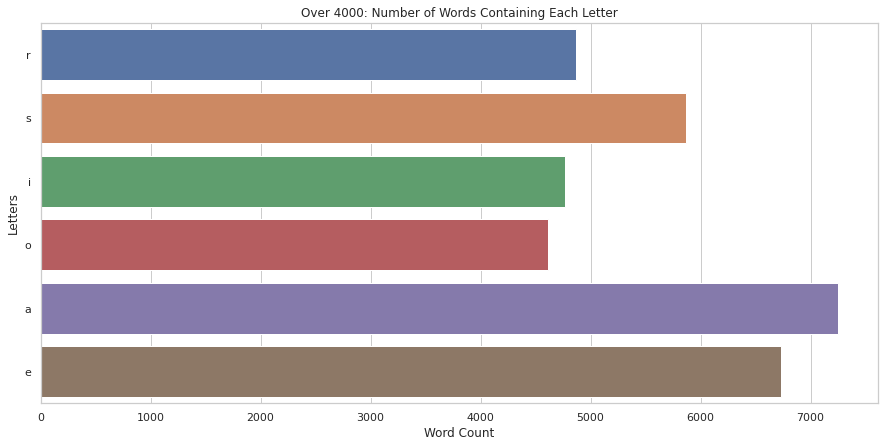

In [64]:
#setup seaborn/matplotlib figure
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 7))

#create visualization ordering letters by the count of words that contain each letter
sns.barplot(x='word count', y='letters', 
            data=df2[df2['word count']>4000], 
            #order=df2.sort_values('word count', ascending=False).letters
            order=df2['letters'].loc[df2['word count'] >4000].value_counts().index
            )
#labels
plt.xlabel('Word Count')
plt.ylabel('Letters')
plt.title('Over 4000: Number of Words Containing Each Letter')